# Movimiento rectilineo  con rozamiento 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def ta(a,b):
    return a*np.log(1+b/a) 

In [3]:
def f(t,a,b):
    return -ta(a,b)+b + (a+b)*(1- np.exp(-t/a))

In [4]:
def eqn(t,a,b):
    return t -f(t,a,b)

In [5]:
def t_desc(a,b):
    td =  fsolve(eqn, x0=b, args = (a,b))
    return td 

In [6]:
desc = np.vectorize(t_desc)

## Gráficos

In [7]:
eps  = 0.01
t0, tmax = 0, 12
a0, amax = eps,3
b0, bmax = 0, 33
M, N = 200, 200
 
a_valores = np.linspace(a0, tmax, N)
b_valores = np.linspace(b0, bmax, N)
t_valores = np.linspace(0, tmax, N)


In [8]:
td_generico = t_desc(2.6,5)[0]
f_generico = f(t_valores, 2.6,5)

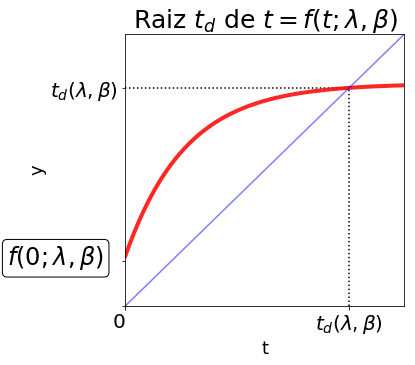

In [9]:
fig = plt.figure(figsize =(5,5))
ax = fig.subplots(1, 1)
ax.set_title(r'Raiz $t_d$ de $t = f(t;\lambda, \beta)$', fontsize=25)
ax.plot(t_valores,f_generico,  c='r',  linewidth=4, alpha=0.85)
ax.plot(t_valores,t_valores,  c='b', alpha=0.5)

plt.hlines(td_generico, 0, td_generico, colors='k', linestyles='dotted')
plt.vlines(td_generico, 0, td_generico, colors='k', linestyles='dotted')

ax.set_xlim(0.0, 12)
ax.set_ylim(0.0, 12)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('y', fontsize=18)

plt.yticks((0,2,td_generico), (" ", " ", r'$t_d(\lambda,\beta$)'))
plt.xticks((0,td_generico), ("0  ", r'$t_d(\lambda,\beta$)'))
              
plt.text(-3, 2.1, r'$f(0; \lambda,\beta$)',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.tick_params(labelsize=20)
plt.show()

In [10]:
aa, bb =  np.meshgrid(a_valores,b_valores)
td = desc(aa, bb)

In [11]:
f_valores = f(t_valores,2.6,5)
ta_valores = ta(2.6,b_valores)

In [12]:
td = desc(2.6, b_valores)

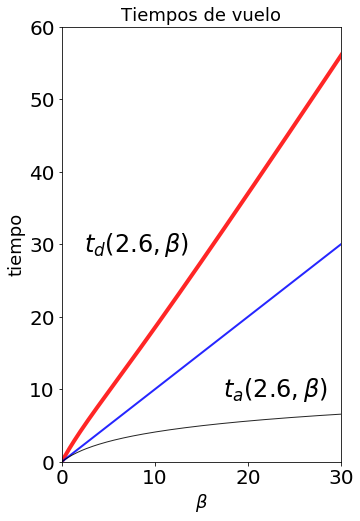

In [13]:
fig = plt.figure(figsize =(5,8))
ax = fig.subplots(1, 1)
ax.plot(b_valores,td,  c='r',  linewidth=4, alpha=0.85)
ax.plot(b_valores,b_valores,  c='b',  linewidth=2, alpha=0.85)
ax.plot(b_valores,ta_valores,  c='k',  linewidth=1, alpha=0.85)
#ax.plot(t_valores,t_valores,  c='b', alpha=0.5)
ax.set_xlim(0.0, 30)
ax.set_ylim(0.0, 60)

plt.text(8, 30, r'$t_d(2.6, \beta$)',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          })

plt.text(23, 10, r'$t_a(2.6, \beta$)',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          })

ax.set_xlabel(r'$\beta$', fontsize=18)
ax.set_ylabel(r'tiempo', fontsize=18)
ax.set_title('Tiempos de vuelo', fontsize=18)
plt.tick_params(labelsize=20)
 
plt.show()